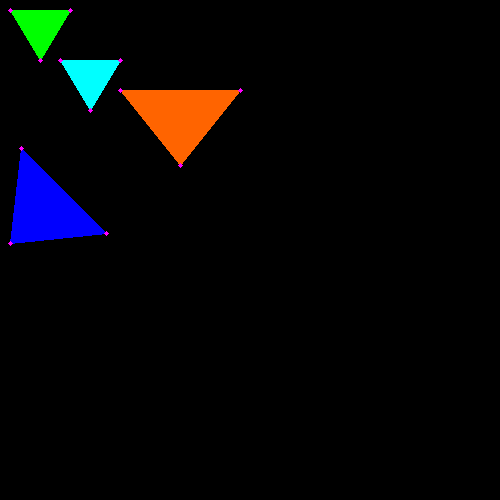

In [15]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

def draw_triangle(im, triangle, color=(0, 255, 0)):
    # Normalizar coordenadas homogéneas
    triangle = np.array([v[:-1] / v[-1] for v in triangle], np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255, 0, 255), -1)

def translate(vertex, dx, dy):
    t = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    v = t @ vertex.T
    return v.T

def scale(vertex, sx, sy):
    scaling_matrix = np.array([[sx, 0, 0],
                               [0, sy, 0],
                               [0, 0, 1]])
    return np.dot(scaling_matrix, vertex.T).T

def rotate(vertex, angle):
    radian_angle = np.radians(angle)
    rotation_matrix = np.array([[np.cos(radian_angle), -np.sin(radian_angle), 0],
                                [np.sin(radian_angle), np.cos(radian_angle), 0],
                                [0, 0, 1]])
    return np.dot(rotation_matrix, vertex.T).T

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h, w, 3), np.uint8)

# Sistema de coordenadas de la imagen
triangle1 = np.array([[10, 10, 1], [70, 10, 1], [40, 60, 1]])

# Triángulo original trasladado
triangle1_translated = translate(triangle1, 50, 50)

# Parámetros de la escala
sx = 2
sy = 1.5

# Triángulo después de trasladar y escalar
triangle1_scaled = scale(triangle1_translated, sx, sy)

# Parámetro de rotación
angle = 45

# Triángulo después de trasladar, escalar y rotar
triangle1_rotated = rotate(triangle1_scaled, angle)

# Dibujar triángulo original, triángulo trasladado, escalado y rotado
draw_triangle(im, triangle1)
draw_triangle(im, triangle1_translated, color=(255, 255, 0))  # Triángulo original trasladado
draw_triangle(im, triangle1_scaled, color=(0, 100, 255))  # Triángulo trasladado y escalado
draw_triangle(im, triangle1_rotated, color=(255, 0, 0))  # Triángulo trasladado, escalado y rotado

cv2_imshow(im)
